In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
AREA = 0.5 * 1 * 0.75**0.5
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

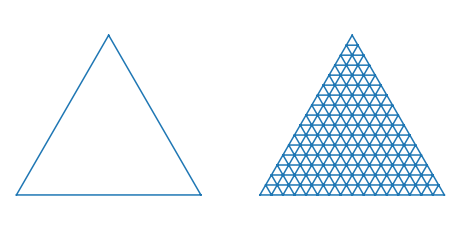

In [4]:
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

plt.figure(figsize=(8, 4))
for (i, mesh) in enumerate((triangle, trimesh)):
    plt.subplot(1, 2, i+ 1)
    plt.triplot(mesh)
    plt.axis('off')
    plt.axis('equal') 

In [5]:
# For each corner of the triangle, the pair of other corners
pairs = [corners[np.roll(range(3), -i)[1:]] for i in range(3)]
# The area of the triangle formed by point xy and another pair or points
tri_area = lambda xy, pair: 0.5 * np.linalg.norm(np.cross(*(pair - xy)))

def xy2bc(xy, tol=1.e-4):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    coords = np.array([tri_area(xy, p) for p in pairs]) / AREA
    return np.clip(coords, tol, 1.0 - tol)

In [6]:
class Dirichlet(object):
    def __init__(self, alpha):
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                           np.multiply.reduce([gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * np.multiply.reduce([xx ** (aa - 1)
                                               for (xx, aa)in zip(x, self._alpha)])

In [7]:
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, cmap='jet', **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

In [8]:
dist = Dirichlet([1.0310, 1.0073, 1.0150])
pdf = dist.pdf([1.0310, 1.0073, 1.0150])
print(pdf)
print(np.log(pdf))

2.1681430314290395
0.7738710553076009


In [9]:
dist = Dirichlet([150.0000,  7.0184, 11.2344])
pdf = dist.pdf([1,  0,0])
print(pdf)
print(-np.log(pdf))

0.0
inf


/var/folders/6t/cwpxfjt13rd3m9sgky7446mm0000gn/T/ipykernel_73778/2634288138.py:4: RuntimeWarning: divide by zero encountered in log
  print(-np.log(pdf))


In [23]:
dist = Dirichlet([50.0000,  7.1892, 10.8057])
pdf = dist.pdf([0.7822, 0.0861, 0.1317])
print(pdf)
print(np.log(pdf))

87.50513963244794
4.471697530295069


In [ ]:
[50.0000,  7.1892, 10.8057]
[0.7822, 0.0861, 0.1317],

In [ ]:
[50.0000,  7.0184, 11.2344],

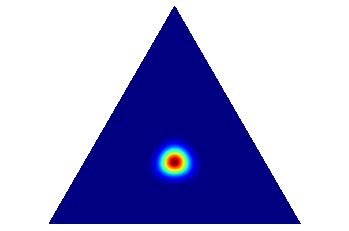

In [14]:
draw_pdf_contours(Dirichlet([50, 50, 40]))

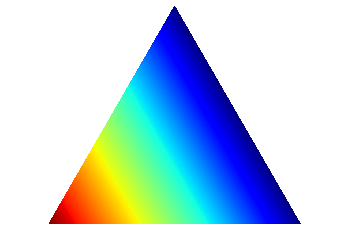

In [9]:
draw_pdf_contours(Dirichlet([2, 1, 1]))

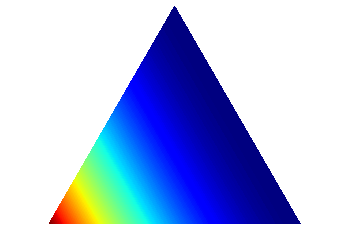

In [10]:
draw_pdf_contours(Dirichlet([3, 1, 1]))

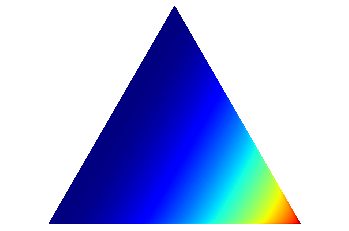

In [11]:
draw_pdf_contours(Dirichlet([0.99, 3, 0.99]))

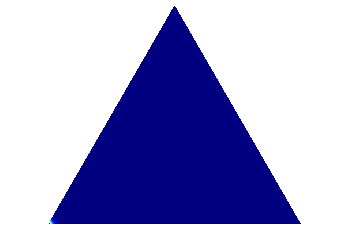

In [29]:
draw_pdf_contours(Dirichlet([100, 0.99, 0.99]))

In [22]:
Dirichlet([1.0543, 1.0712, 1.0766]).pdf([0.7231, 0.1062, 0.1707])

1.9747200193947827

In [21]:
# first observation - first time stamp
loss_1_1 = np.exp(np.log(Dirichlet([1.0543, 1.0712, 1.0766]).pdf([0.7231, 0.1062, 0.1707])))
print(loss_1_1) 

loss_1_2 = -np.log(Dirichlet([1.0914, 1.0825, 1.0955]).pdf([0.7327, 0.0939, 0.1734]))
print(loss_1_2)

loss_1_3 = -np.log(Dirichlet([1.0910, 1.0867, 1.0919]).pdf([0.7345, 0.1024, 0.1631]))
print(loss_1_3)

loss_1_4 = -np.log(Dirichlet([1.0908, 1.0887, 1.0910]).pdf([0.7239, 0.1061, 0.1700]))
print(loss_1_4)

loss_1_5 = -np.log(Dirichlet([1.0908, 1.0896, 1.0906]).pdf([0.7159, 0.1012, 0.1829]))
print(loss_1_5)

loss_1_6 = -np.log(Dirichlet([1.0908, 1.0901, 1.0905]).pdf([0.7033, 0.1008, 0.1958]))
print(loss_1_6)

loss_1_7 = -np.log(Dirichlet([1.0908, 1.0904, 1.0905]).pdf([0.6995, 0.0963, 0.2042]))
print(loss_1_7)

print(loss_1_1+loss_1_2+loss_1_3+loss_1_4+loss_1_5+loss_1_6+loss_1_7)

1.9747200193947827
-0.7010469699750694
-0.6999980621807268
-0.7040581395608714
-0.7048617311400759
-0.7086703716014654
-0.7076018025865896
-2.2515170576500156


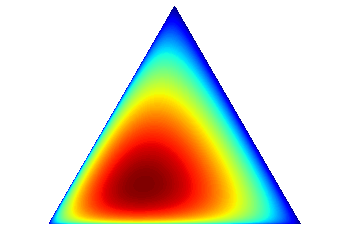

In [21]:
draw_pdf_contours(Dirichlet([np.exp(0.5), np.exp(0.3), np.exp(0.2)]))